In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
link="https://raw.githubusercontent.com/virajbhutada/telecom-customer-churn-prediction/refs/heads/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df=pd.read_csv(link)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 2})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 2})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 2})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 2})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No phone service': 2, 'No': 3})
df['InternetService'] = df['InternetService'].map({'DSL': 1, 'Fiber optic': 2, 'No': 3})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 2, 'No internet service': 3})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 2, 'No internet service': 3})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 2, 'No internet service': 3})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 2, 'No internet service': 3})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 2, 'No internet service': 3})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 2, 'No internet service': 3})
df['Contract'] = df['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 2})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4})

In [ ]:
df = df.drop(['customerID',], axis=1)

In [ ]:
X = df.drop(['Churn'], axis=1)
X['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
y = df['Churn']


In [ ]:
X.shape

(7043, 19)

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)


In [ ]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(X_test, dtype=torch.float32)

# Convert pandas Series to NumPy arrays, then to PyTorch tensors with the correct shape
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
class SimpleBinaryClassifier(nn.Module):
    def __init__(self):
        super(SimpleBinaryClassifier, self).__init__()
        self.linear1 = nn.Linear(19, 32)
        self.Linear2 = nn.Linear(32,1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.Linear2(x)
        return x


In [ ]:
train_losses = []
test_losses = []

In [ ]:
model = SimpleBinaryClassifier()

loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear previous gradients
    logits = model(X_train)
    logits = model(X_train)
    loss = loss_function(logits, y_train)
    loss.backward()
    optimizer.step()

    # Append the training loss for each epoch
    train_losses.append(loss.item())

    # Evaluate on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation during evaluation
        test_logits = model(X_test)  # Forward pass on test set
        test_loss = loss_function(test_logits, y_test)  # Compute test loss

    # Append the test loss for each epoch
    test_losses.append(test_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")



Epoch 1/5, Train Loss: nan, Test Loss: nan
Epoch 2/5, Train Loss: nan, Test Loss: nan
Epoch 3/5, Train Loss: nan, Test Loss: nan
Epoch 4/5, Train Loss: nan, Test Loss: nan
Epoch 5/5, Train Loss: nan, Test Loss: nan


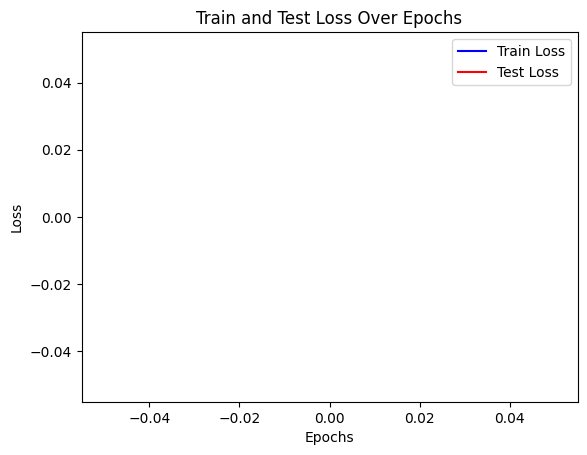

In [ ]:
# After training, plot the losses
plt.plot(train_losses, color='blue', label='Train Loss')
plt.plot(test_losses, color='red', label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')

plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
    model.eval()e
    test_logits = model(X_test)
    predictions = torch.sigmoid(test_logits) >= 0.5
    predicted_labels = (predictions > 0.5).float()
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 73.31%


In [ ]:
print("Actual vs Predicted Targets:")
for actual, predicted in zip(y_test[:10], predicted_labels[:10]):  # Print first 10 results
    print(f"Actual: {actual.item()} - Predicted: {predicted.item()}")

Actual vs Predicted Targets:
Actual: 1.0 - Predicted: 0.0
Actual: 0.0 - Predicted: 0.0
Actual: 1.0 - Predicted: 0.0
Actual: 1.0 - Predicted: 0.0
Actual: 1.0 - Predicted: 0.0
Actual: 1.0 - Predicted: 0.0
Actual: 0.0 - Predicted: 0.0
Actual: 0.0 - Predicted: 0.0
Actual: 1.0 - Predicted: 0.0
Actual: 0.0 - Predicted: 0.0
